# Libraries

The main libraries that are used are tensorflow2, keras, numpy and pandas

## The Goal is to create a chatbot to help in the recruitment process. Organization name is Pirate's

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer


In [2]:
%%writefile intent.json
{"intents": [
    {"tag": "greeting",
    "input":["Hi","Hey","Hello","Is Anyone There?","Hay"],
    "responses":["Hello","Hi","Hey"]
    },
    {"tag":"goodbye",
    "input":["Bye","See you later","Goodbye"],
    "responses": ["See you later","Bye","Come back again","Have a nice day"]
    },
    {"tag": "thanks",
    "input":["Thanks","Thank you", "Thats helpful","Thanks for the help"],
    "responses":["Happy to hepl!","Any time!","My Plesure","Your most welcome"]
    },
    {"tag": "help",
    "input":["Could you help me","give me a hand please","can you help","What can you do for me","I need a support", "I need your help","support me please"],
    "responses":["Tell me how can we assist you","please share your problem","Sure, How can we may assist you"]
    },
    {"tag":"complaint",
    "input":["I have a complaint", "I want to raise a complaint","There is a complaint about your service"],
    "responses":["Please provide us your complaint in order to assist you","Kindly mention your complaint,we will reach you and sorry for any inconvenience caused"]
    },
    {"tag":"product_availability",
    "input":["Do you have fresh Oranges in stock?","Are Oranges available today","Can i buy Oranges right now?","Is there fresh stock of oranges?"],
    "responses":["Yes,fresh ornages are available today!Would you like to add some on your cart?","Absolutely! Fresh oranges are in stock, would you like to order some?","Yes,fresh oranges are ready to purchase. Feel free to add them in your cart!","Yes, we have just received a fresh stock of oranges.You can order them now"]
    },
    {"tag":"price_inquiry",
    "input":["Whats the prize of Bananas?","How much are Bananas per kg?","Can you tell me cost of Bananas today?","Whats the rate of 1Kg of Bananas?"],
    "responses":["Bananas are $40 per kg today.Would you like to add them to your cart","The current price for bananas is ₹40 per kg. How many would you like?","Today's price for bananas is ₹40 per kg. Feel free to order!","Bananas are priced at ₹40 per kg today."]
    },
    {"tag": "delivery_options",
    "input": ["What delivery options do you offer?","How can I get my items delivered?","What are the shipping options?","Are there different delivery choices?"],
    "responses": ["We offer same-day, next-day, and scheduled delivery options. Which one suits you?","You can choose between same-day delivery (if ordered before 2 PM), next-day, or scheduled delivery.","Our shipping options include same-day and next-day delivery.","Yes, we offer same-day, next-day, and scheduled delivery options."]
    },
    {"tag": "order_status",
    "input": ["Where's my order?","Can I track my order?","What's the current status of my order?","Has my order been shipped?"],
    "responses": ["You can track your order using the link in your confirmation email or via the 'Order Tracking' page on our website.","Yes, you can track your order through the tracking link we emailed to you.","You can check the status of your order via the 'My Orders' section on our website.","Please provide your order number, and I'll check the shipping status for you."]
    },
    {"tag": "payment_methods",
    "input": ["What payment options do you accept?","Can I pay via credit card?","Do you support UPI payments?","What methods of payment can I use?"],
    "responses": ["We accept major credit cards, debit cards, UPI, and cash on delivery.","Yes, you can use any major credit card to complete your purchase.","Yes, UPI payments are accepted.","You can pay using credit cards, debit cards, UPI, or cash on delivery."]
    },
    {"tag": "discounts_promotions",
    "input":["Are there any deals today?","Do you have promotions running?","Can I get any discounts today?","Are there any special offers on items?"],
    "responses":["Yes! We have a 10% discount on fruits and 15% off on vegetables today.","Yes, we're offering discounts on select items like fruits, vegetables, and fish.","Yes, there's a 15% discount on vegetables. Would you like me to add some to your cart?","Yes, we have promotions on fruits and fish today. You can view all the deals on our promotions page."]
    },
    {"tag": "quality_freshness",
    "input":["Are the fruits organic?","Do you sell pesticide-free vegetables?","How fresh are your fish?","Are the vegetables chemical-free?"],
    "responses":["Yes, we have a selection of organic fruits available. Look for the 'Organic' label.","Yes, many of our vegetables are grown without pesticides, and we also offer certified organic options.","Our fish is sourced daily to ensure maximum freshness. You can check the fish section for more details.","Yes, we offer vegetables that are grown with minimal or no chemicals, and organic options are available."]
    },
    {"tag": "order_placement",
    "input":["How do I place an order on the website?","Can I order online?","What's the process to make an order?","How can I add items to my cart?"],
    "responses":["Simply browse the products, add them to your cart, and proceed to checkout. Let me know if you need help.","Yes, you can place your order directly through our website.","Browse our products, add items to your cart, and proceed to checkout.","To add items, simply click on the product and choose 'Add to Cart'."]
    }, 
    {"tag": "stock_inquiry",
    "input":["What vegetables are available today?","Which fruits are currently in stock?","Can you show me all the fish in stock?","What fresh produce do you have right now?"],
    "responses":["We have fresh tomatoes, spinach, carrots, and more in stock today.","We have fresh apples, bananas, oranges, and more available today.","We have salmon, mackerel, and prawns in stock. Would you like to view more options?","We have a variety of fresh fruits and vegetables available. You can browse the full list on our website."]
    },
    {"tag": "order_modification",
    "input":["Can I change my order after placing it?","How do I modify my order?","Can I add items to my order after checking out?","How can I cancel my order?"],
    "responses":["Yes, you can modify your order as long as it hasn't been shipped yet. Please visit the 'My Orders' section to make changes.", "You can modify your order through the 'My Orders' section on the website before it’s shipped.", "Yes, you can add items if your order hasn't been processed yet. Please visit 'My Orders' to modify it.", "You can cancel your order from the 'My Orders' page before it's shipped."]
    }     
]
}




    

Overwriting intent.json


# Importing the Data

In [3]:
# importing the dataset
with open('intent.json') as content:
    data1 = json.load(content)

In [4]:
# getting all the data to lists
tags = []
inputs = []
responses = {}
for intent in data1['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['input']:
        inputs.append(lines)
        tags.append(intent['tag'])

In [5]:
# converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [6]:
#printing the data
data

,inputs,tags
0,Hi,greeting
1,Hey,greeting
2,Hello,greeting
3,Is Anyone There?,greeting
4,Hay,greeting
...,...,...
57,What fresh produce do you have right now?,stock_inquiry
58,Can I change my order after placing it?,order_modification
59,How do I modify my order?,order_modification
60,Can I add items to my order after checking out?,order_modification


In [7]:
data = data.sample(frac=1)

# Pre-Processing

In [8]:
# removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
21,there is a complaint about your service,complaint
26,whats the prize of bananas,price_inquiry
47,do you sell pesticidefree vegetables,quality_freshness
32,what are the shipping options,delivery_options
27,how much are bananas per kg,price_inquiry
...,...,...
4,hay,greeting
53,how can i add items to my cart,order_placement
34,wheres my order,order_status
6,see you later,goodbye


In [9]:
# tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

#Apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

# Encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [10]:
input_shape = x_train.shape[1]
print(input_shape)

10


In [11]:
#Define Vocabulary
vocabulary = len(tokenizer.word_index)
print("Number of Unique Words : ",vocabulary)
output_length = le.classes_.shape[0]
print("Output Length: ",output_length)

Number of Unique Words :  125
Output Length:  15


# Neural Network

In [12]:
# creating the Model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model = Model(i,x)

In [13]:
#Compiling the Model 
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',metrics=['accuracy'])

In [14]:
# Training the Model
train = model.fit(x_train,y_train,epochs=150)

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.0212 - loss: 2.7112
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0954 - loss: 2.7086
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1270 - loss: 2.7062
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1388 - loss: 2.7047 
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1909 - loss: 2.7019 
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1176 - loss: 2.7012 
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1596 - loss: 2.6974 
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1596 - loss: 2.6959
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1804 - loss: 2.6923
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1808 - loss: 2.6908
Epoch 11/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1704 - loss: 2.6914 
Epoch 12/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1912

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4792 - loss: 1.7756
Epoch 70/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4684 - loss: 1.7435
Epoch 71/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4892 - loss: 1.7043
Epoch 72/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4688 - loss: 1.6813
Epoch 73/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5316 - loss: 1.6650
Epoch 74/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5635 - loss: 1.6067
Epoch 75/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5531 - loss: 1.6169 
Epoch 76/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6270 - loss: 1.5726 
Epoch 77/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5531 - loss: 1.5786 
Epoch 78/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5430 - loss: 1.5351
Epoch 79/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5961 - loss: 1.5241 
Epoch 80/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6065 - lo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9046 - loss: 0.5851
Epoch 138/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9150 - loss: 0.5619 
Epoch 139/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9358 - loss: 0.5535 
Epoch 140/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9150 - loss: 0.5656
Epoch 141/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9150 - loss: 0.5495 
Epoch 142/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8942 - loss: 0.5698
Epoch 143/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9150 - loss: 0.5279
Epoch 144/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9150 - loss: 0.5092
Epoch 145/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9358 - loss: 0.4991
Epoch 146/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9150 - loss: 0.5032 
Epoch 147/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9254 - loss: 0.4863
Epoch 148/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 

# Model Analysis

the model got a perfect accuracy of 100%

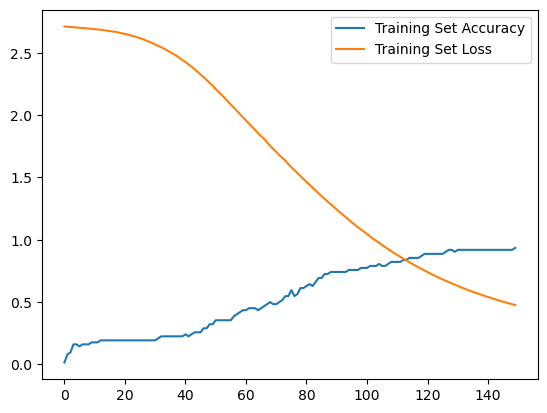

In [15]:
# Plotting model accuracy
plt.plot(train.history['accuracy'],label='Training Set Accuracy')
plt.plot(train.history['loss'],label='Training Set Loss')
plt.legend()

# Testing

In [ ]:
#Chatting

import random

texts_p = []
while True:
    prediction_input = input('User : ')
    hyh = prediction_input
    #Removing Punctuation and Converting to Lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    #Tokenizing and Padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)
    
    #Getting Output from model
    output = model.predict(prediction_input)
    output = output.argmax()

    # Finding the Right tag and Predicting
    response_tag = le.inverse_transform([output])[0] 
    print("ChatBot : ",random.choice(responses[response_tag]))
    if hyh == "goodbye":
        break
    texts_p = []

User : is apple available?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
ChatBot :  Hey
User : i have a complaint
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
ChatBot :  Kindly mention your complaint,we will reach you and sorry for any inconvenience caused
User : there is a complaint
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
ChatBot :  Yes, we have promotions on fruits and fish today. You can view all the deals on our promotions page.
